# **Principles of Data Science 2024 - Capstone Project**



*   Final product should include 2 files:
  * PDF that contains intro paragraph about preprocessing/how you seeded the RNG + answers to the questions
  * Python file (.py) with the code that performed the data analysis and created the figures.
* Open the PDF with a brief statement for how you handled preprocessing (e.g. dimension reduction, data cleaning, and data transformations)
* In the PDF, answers should include (1) text - describing what I did and what I found, (2) a figure - illustrating findings, and (3) numbers e.g. test stats, confidence intervals, p-values
* PDF should be 4-6 pages long. expect 1/2 a page per question.


### Preprocessing + EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, ttest_ind
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score


data=pd.read_csv('https://raw.githubusercontent.com/kkrysw/PODS-Spotify/main/spotify52kData.csv')
data.head(3)

,songNumber,artists,album_name,track_name,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,1,-6.746,0,0.1430,0.0322,0.000001,0.358,0.715,87.917,4,acoustic
1,1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.166,1,-17.235,1,0.0763,0.9240,0.000006,0.101,0.267,77.489,4,acoustic
2,2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.359,0,-9.734,1,0.0557,0.2100,0.000000,0.117,0.120,76.332,4,acoustic


In [ ]:
data.tail(3)

,songNumber,artists,album_name,track_name,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
51997,51997,Don Omar,Última Misión Reggaeton,Dale Don Dale,0,212413,False,0.831,0.818,2,-7.827,1,0.0824,0.02450,0.000319,0.0892,0.819,95.022,4,hip-hop
51998,51998,Moneybagg Yo;Pooh Shiesty;Lil Durk;EST Gee,Energy Hip Hop,Switches & Dracs,0,168620,True,0.727,0.647,11,-7.383,0,0.2800,0.03290,0.000000,0.2460,0.529,159.959,4,hip-hop
51999,51999,Don Omar;Juan Magán,Perreo Tenebroso Vol. 4,No Sigue Modas Aka Ella No Sigue Modas,0,232000,False,0.685,0.862,0,-4.611,1,0.0627,0.00757,0.001400,0.0226,0.884,128.032,4,hip-hop


In [ ]:
data.sample(3)

,songNumber,artists,album_name,track_name,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
40284,40284,Marcus Salles,Estamos de Pé (Ao Vivo),Estamos de Pé - Ao Vivo,44,396911,False,0.511,0.766,2,-7.403,1,0.0359,0.10900,0.000025,0.720,0.331,104.046,4,gospel
4523,4523,Bicep,Water,Waterfall,53,291944,False,0.518,0.933,4,-5.410,0,0.0355,0.05240,0.985000,0.131,0.372,129.997,4,ambient
17435,17435,HORSKH,Wire,Black Switch,19,194480,False,0.602,0.990,3,-5.463,0,0.1810,0.00132,0.047000,0.384,0.169,125.034,4,club


In [ ]:
data.shape

(52000, 20)

In [ ]:
data.columns

Index(['songNumber', 'artists', 'album_name', 'track_name', 'popularity',
       'duration', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

a) handling missing data:
* choose deletion or imputation for null/missing values
* check for duplicates, and drop them


In [ ]:
data.isnull().sum()

songNumber          0
artists             0
album_name          0
track_name          0
popularity          0
duration            0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [ ]:
# checking for any "hidden" missing values
(data[['duration']]==-1).sum()

duration    0
dtype: int64

In [ ]:
data.duplicated().value_counts()

False    52000
Name: count, dtype: int64

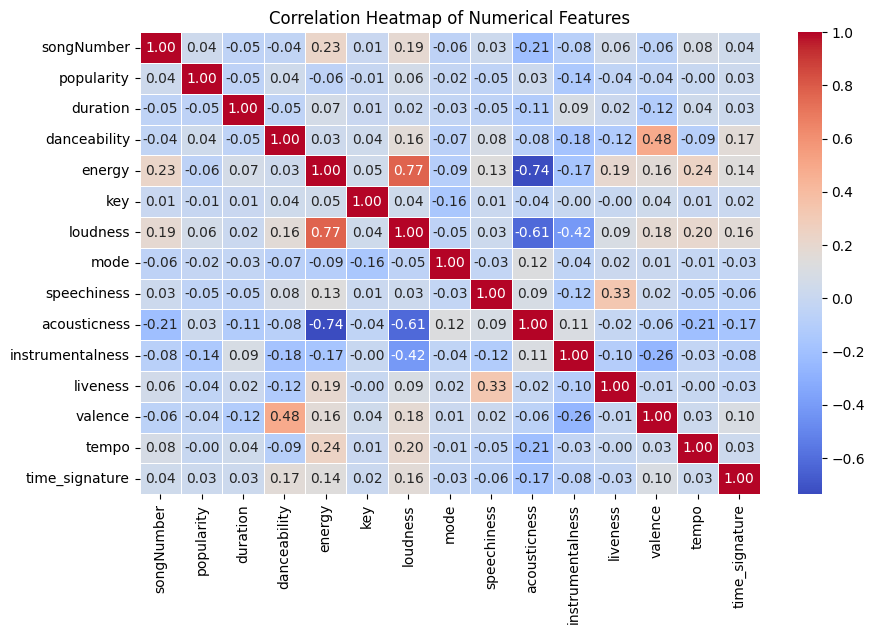

In [ ]:
numerical_data = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

b) data transformation: apply any normalization or smoothing as necessary. because most musical features of interest (e.g. danceability, energy, loudness, speechiness, acousticness, instrumentalness, lieveness, valence) take on values of 0 and 1, i find normalization unnecessary - they already have a common scale.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   songNumber        52000 non-null  int64  
 1   artists           52000 non-null  object 
 2   album_name        52000 non-null  object 
 3   track_name        52000 non-null  object 
 4   popularity        52000 non-null  int64  
 5   duration          52000 non-null  int64  
 6   explicit          52000 non-null  bool   
 7   danceability      52000 non-null  float64
 8   energy            52000 non-null  float64
 9   key               52000 non-null  int64  
 10  loudness          52000 non-null  float64
 11  mode              52000 non-null  int64  
 12  speechiness       52000 non-null  float64
 13  acousticness      52000 non-null  float64
 14  instrumentalness  52000 non-null  float64
 15  liveness          52000 non-null  float64
 16  valence           52000 non-null  float6

### (1) Consider the 10 song features (duration, danceability, etc.) Is any of these features reasonably distributed normally? If so, which one?

for this question, it is important for us to look at the raw distribution and not attempt to handle outliers.

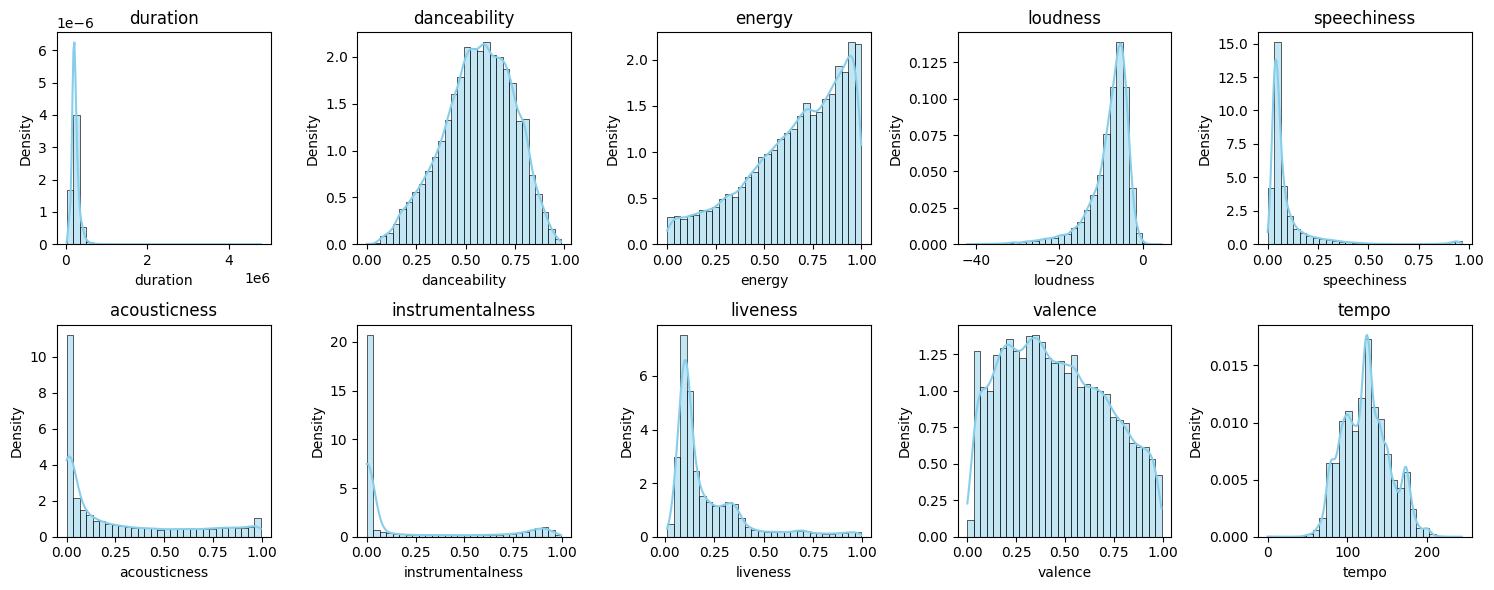

In [ ]:
# question 1
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
axs = axs.flatten()
features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
for i, feature in enumerate(features):
    sns.histplot(data[feature], kde=True, ax=axs[i], color='skyblue', stat='density', bins=30)
    axs[i].set_title(feature)
plt.tight_layout()
plt.show()

it seems like danceability and tempo are the only two which seem to follow an approximately normal distribution. to check this, let's create QQ plots for the features:

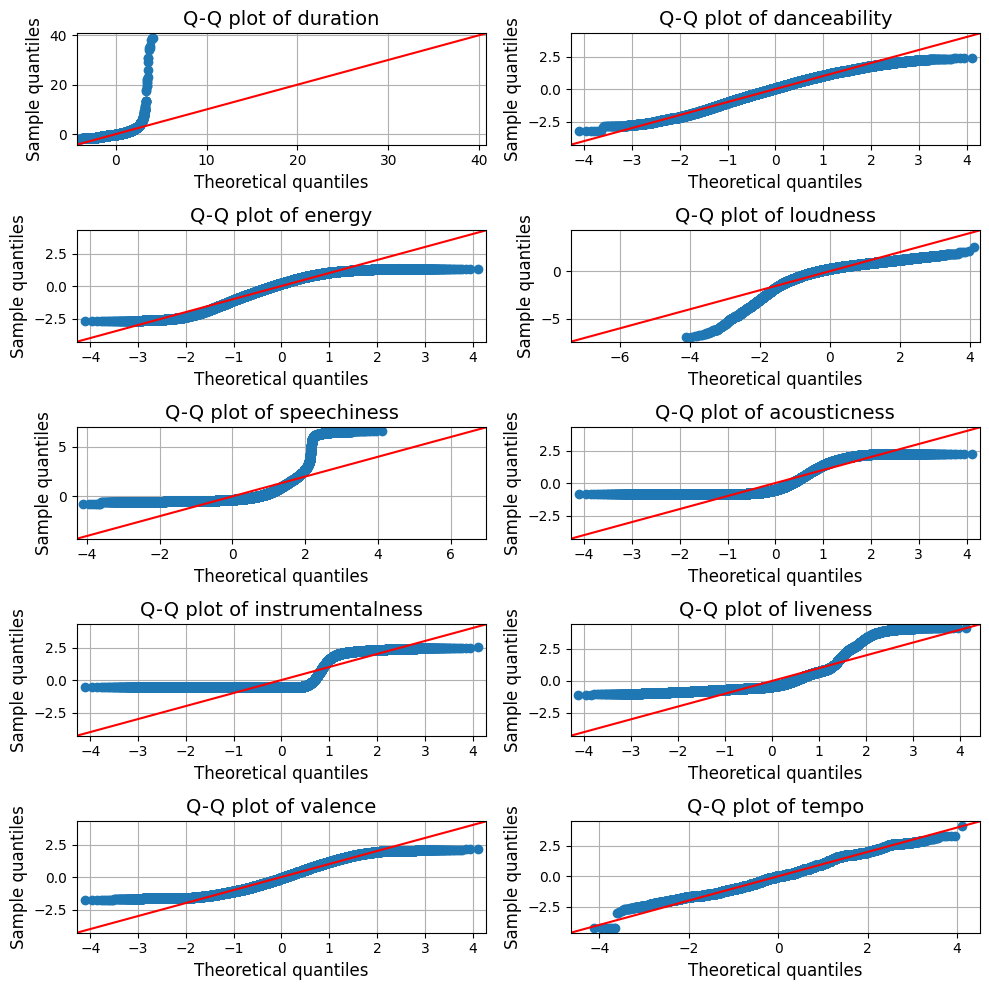

In [ ]:
from statsmodels.graphics.gofplots import qqplot
data_norm = data[features]

num_rows = 5
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))
axes = axes.flatten()

for i, c in enumerate(data_norm.columns):
    qqplot(data_norm[c], line='45', fit=True, ax=axes[i])
    axes[i].set_title("Q-Q plot of {}".format(c), fontsize=14)
    axes[i].set_xlabel("Theoretical quantiles", fontsize=12)
    axes[i].set_ylabel("Sample quantiles", fontsize=12)
    axes[i].grid(True)

plt.tight_layout()
plt.show()

Conclusion: From the histograms and the Q-Q plots, it seems that 'danceability' and 'tempo' are the only 2 features that are approximately normally distributed.

### (2) Is there a relationship between song length and popularity of a song? If so, is the relationship positive or negative?

In [ ]:
# question 2

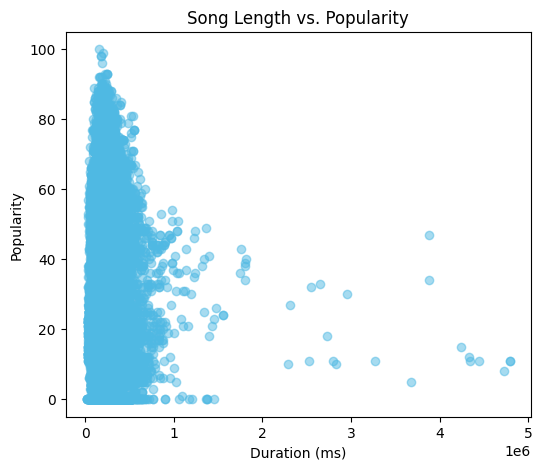

Pearson correlation coefficient: -0.05465119593637635
Spearman correlation coefficient: -0.03728567620648788


In [ ]:
# inspect different correlation coefficients for song length and popularity
# include scatterplots
from scipy.stats import pearsonr, spearmanr


plt.figure(figsize=(6, 5))
plt.scatter(data['duration'], data['popularity'], alpha=0.5,color='#4fb9e3')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.title('Song Length vs. Popularity')
plt.show()

pearson_corr, pearson_p_value = pearsonr(data['duration'], data['popularity'])
spearman_corr, spearman_p_value = spearmanr(data['duration'], data['popularity'])

# correlation coefficients
print("Pearson correlation coefficient:", pearson_corr)
print("Spearman correlation coefficient:", spearman_corr)

### (3) Are explicitly rated songs more popular than songs that are not explicit?

i am exploring the relationship between popularity (numerical) and explicit (categorical). since explicit is a boolean/categorical value, it would not be meaningful to reduce it to sample means. moreover, we are primarily interested in comparing the distributions of a numerical variable (popularity) between two independent groups (explicit VS non-explicit). as such, we know that a non-parametric significance test would be best, specifically the mann-whitney U test.

In [ ]:
# question 3
from scipy.stats import mannwhitneyu

# group data by explicit or non-explicit
explicit_songs = data[data['explicit'] == True]['popularity']
non_explicit_songs = data[data['explicit'] == False]['popularity']

# perform the mann-whitney U test using the scipy.stats library
statistic, p_value = mannwhitneyu(explicit_songs, non_explicit_songs)

# print results
print("Mann-Whitney U Test:")
print("Test Statistic:", statistic)
print("p-value:", p_value)

# interpret the results
alpha = 0.05  # Significance level
if p_value > alpha:
    print("There is no significant difference in popularity between explicit and non-explicit songs.")
else:
    print("There is a significant difference in popularity between explicit and non-explicit songs.")


Mann-Whitney U Test:
Test Statistic: 139361273.5
p-value: 3.0679199339114678e-19
There is a significant difference in popularity between explicit and non-explicit songs.


### (4) Are songs in major key more popular than songs in minor key?

i am exploring the relationship between popularity (numerical) and mode (categorical). again, it would be best to do a mann-whitney U test for the same reasons as above.

In [ ]:
# question 4
minor_songs = data[data['mode'] == 0]['popularity']
major_songs = data[data['mode'] == 1]['popularity']

# perform the mann-whitney U test using the scipy.stats library
statistic, p_value = mannwhitneyu(minor_songs, major_songs)

# print results
print("Mann-Whitney U Test:")
print("Test Statistic:", statistic)
print("p-value:", p_value)

# interpret the results
alpha = 0.05  # Significance level
if p_value > alpha:
    print("There is no significant difference in popularity between major and minor songs.")
else:
    print("There is a significant difference in popularity between major and minor songs.")

Mann-Whitney U Test:
Test Statistic: 325452746.0
p-value: 2.0175287554899416e-06
There is a significant difference in popularity between major and minor songs.


### (5) Energy is believed to largely reflect the “loudness” of a song. Can you substantiate (or refute) that this is the case?

This question suggests that a correlation between energy and loudness is plausible.
- do a scatterplot
- get the correlation coefficient

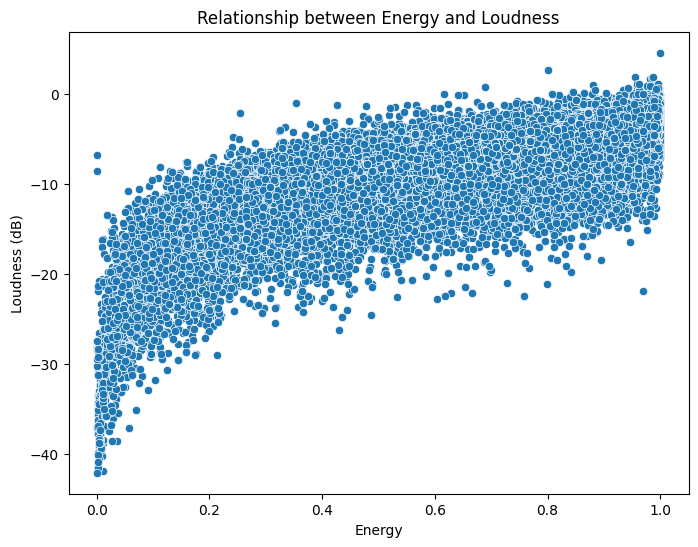

In [ ]:
# question 5

plt.figure(figsize=(8, 6))
sns.scatterplot(x='energy', y='loudness', data=data)
plt.title("Relationship between Energy and Loudness")
plt.xlabel("Energy")
plt.ylabel("Loudness (dB)")
plt.show()

This looks like a square root function, which is not linear - calculating the Pearson coefficient would still give me more insight. I will also calculate the Spearman coefficient again for non-linear relationships, just to be safe:

In [ ]:
# inspect different correlation coefficients for energy and loudness
pearson_corr, pearson_p_value = pearsonr(data['energy'], data['loudness'])
spearman_corr, spearman_p_value = spearmanr(data['energy'], data['loudness'])

print("Pearson correlation coefficient:", pearson_corr)
print("Spearman correlation coefficient:", spearman_corr)

Pearson correlation coefficient: 0.7748808291850187
Spearman correlation coefficient: 0.7306382054765808


Both coefficients are pretty strong. Inspecting the correlation heatmap from EDA, it also doesn't seem like there would be any confounding features. It is safe to say that energy and loudness have a strong and positive correlation, so songs that are loud will also tend to be energetic--however, this is not to say that loudness is the causal result of energy (this relationship cannot be established as causal without experiments).

### (6) Which of the 10 individual (single) song features from question 1 predicts popularity best? How good is this “best” model?

for-loop for 10 different models; compare performance

In [ ]:
# question 6
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

all_r_squared=[]
all_rmse=[]

for i in features:
  X = data[[i]]
  y=data['popularity']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # linear regression model
  model = LinearRegression()
  model.fit(X_train, y_train)

  # make predictions on the test set
  y_pred = model.predict(X_test)

  # evaluate the model
  r_squared = r2_score(y_test, y_pred)
  all_r_squared.append(r_squared)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  all_rmse.append(rmse)

  print(f"R-squared: {r_squared}")
  print(f"RMSE for {i}: {rmse}")
  print(f"Coefficient for {i}: {model.coef_}")
  print(f"Intercept for {i}: {model.intercept_}")

max_r_squared=max(all_r_squared)
max_r_index=all_r_squared.index(max_r_squared)
min_rmse=min(all_rmse)
min_rmse_index=all_rmse.index(min_rmse)

print("")
print('Best R squared:',max_r_squared,'which corresponds to',features[max_r_index])
print('Best RMSE:',min_rmse,'which corresponds to',features[min_rmse_index])

R-squared: 0.003756891592990752
RMSE for duration: 21.645897388982238
Coefficient for duration: [-9.62867732e-06]
Intercept for duration: 35.32900579224239
R-squared: 0.001977090862231079
RMSE for danceability: 21.66522409372876
Coefficient for danceability: [4.3145624]
Intercept for danceability: 30.678534061855895
R-squared: 0.004449112036058356
RMSE for energy: 21.638375963614628
Coefficient for energy: [-4.59734715]
Intercept for energy: 36.18520244552158
R-squared: 0.002849207560424505
RMSE for loudness: 21.655756007841426
Coefficient for loudness: [0.27194145]
Intercept for loudness: 35.279252285719636
R-squared: 0.0020563842530981757
RMSE for speechiness: 21.66436342049667
Coefficient for speechiness: [-8.17820838]
Intercept for speechiness: 33.89375718540191
R-squared: 0.0011416615545840614
RMSE for acousticness: 21.674290006357904
Coefficient for acousticness: [1.60834915]
Intercept for acousticness: 32.675428308041056
R-squared: 0.02110466494367702
RMSE for instrumentalness: 

The one feature which best predicts popularity is instrumentalness. When performing simple linear regression, this feature yields an r^2 value of 0.021 and an RMSE value of 21.457.

### (7) Building a model that uses *all* of the song features from question 1, how well can you predict popularity now? How much (if at all) is this model improved compared to the best model in question 6. How do you account for this?

multiple regression with all 10 woooo

In [ ]:
# question 7
from scipy import stats

scaled_data = stats.zscore(data[features])
X = scaled_data  # Features
y = data['popularity']  # Target variable

# cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# linear regression
model_all_features = LinearRegression()
model_all_features.fit(X_train, y_train)
y_pred_all_features = model_all_features.predict(X_test)

# evaluate
r_squared_all_features = r2_score(y_test, y_pred_all_features)
rmse_all_features = mean_squared_error(y_test, y_pred_all_features, squared=False)

print(f"R-squared with all features: {r_squared_all_features}")
print(f"RMSE with all features: {rmse_all_features}")

R-squared with all features: 0.05235411982671212
RMSE with all features: 21.111348243501684


With all the features, multiple regression yiels an r^2 value of 0.052 and an RMSE value of 21.111. This is slightly better than the best simple linear regression model from (7), albeit not by much - I would attribute this result due to collinearity, which tends to inflate the r-squared model.

### (8) When considering the 10 song features above, how many meaningful principal components can you extract? What proportion of the variance do these principal components account for?

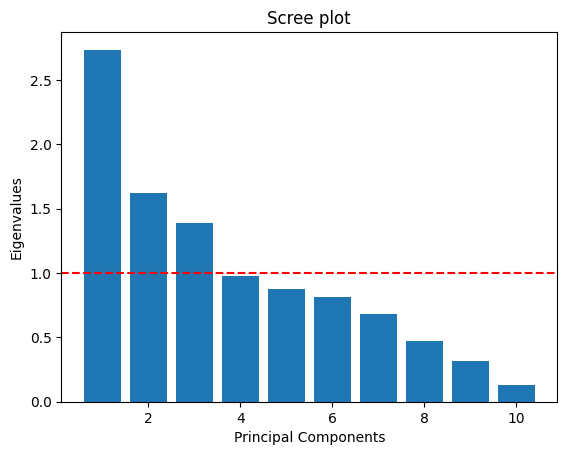

Eigenvalues above 1.0: 3


In [ ]:
# question 8
from scipy.linalg import svd
from scipy import stats

scaled_data=stats.zscore(data[features])
pca = PCA().fit(scaled_data)

eigVals=pca.explained_variance_
loadings = pca.components_*-1

origDataNewCoordinates = pca.fit_transform(scaled_data)*-1

# screeplot
numPredictors = 10
plt.bar(np.linspace(1,numPredictors,numPredictors),eigVals)
plt.axhline(y=1.0, color='r', linestyle='--')
plt.title('Scree plot')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.show()

num_kaiser =  sum(eigVals > 1.0)
print("Eigenvalues above 1.0:",num_kaiser)

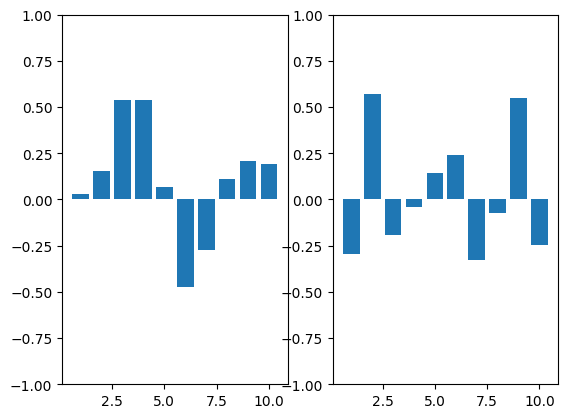

(-1.0, 1.0)

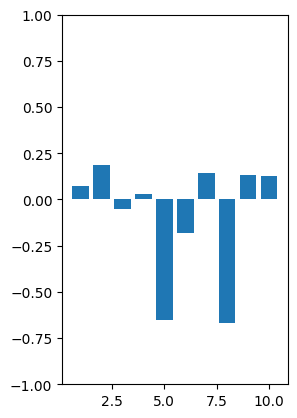

In [ ]:
plt.subplot(1,2,1) # Factor 1:
plt.bar(np.linspace(1,numPredictors,numPredictors),loadings[0,:])
plt.ylim(-1, 1)
plt.subplot(1,2,2) # Factor 2:
plt.bar(np.linspace(1,numPredictors,numPredictors),loadings[1,:])
plt.ylim(-1, 1)
plt.show()
plt.subplot(1,2,2) # Factor 3:
plt.bar(np.linspace(1,numPredictors,numPredictors),loadings[2,:])
plt.ylim(-1, 1)

In [ ]:
pca = PCA(n_components=num_kaiser)
pca_data = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_data, columns=[f'PC{i}' for i in range(1, num_kaiser+1)])

# multiple regression
X = pca_df  # Features
y = data['popularity']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# beta coefficients for the model
betas = pd.DataFrame({'Feature': pca_df.columns, 'Coefficient': model.coef_})
print(betas)

# evaluate the model
y_pred = model.predict(X_test)
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")

  Feature  Coefficient
0     PC1    -0.169355
1     PC2    -1.005748
2     PC3    -0.629783
R-squared: 0.004686773039198955


I extracted 3 meaningful principal components from the data. Together, they account for about 0.469% of the variance in the popularity data.

### (9) Can you predict whether a song is in major or minor key from valence? If so, how good is this prediction? If not, is there a better predictor?

Coefficient: [0.12547402] Intercept: [0.44901139]


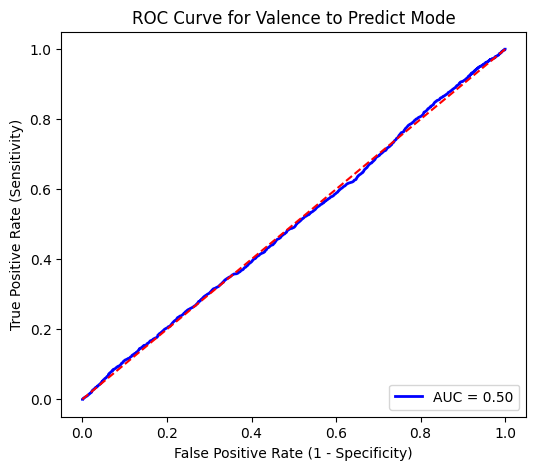

In [ ]:
# question 9
from sklearn.metrics import roc_curve, roc_auc_score

X = data[['valence']]
y = data['mode']

# cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)
print("Coefficient:",model.coef_[0], "Intercept:",model.intercept_)

y_pred_prob = model.predict_proba(X_test)[:, 1]  # Predict probabilities for class 1 (major)
y_pred = model.predict(X_test)

# the roc curve almighty
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for Valence to Predict Mode')
plt.legend(loc='lower right')
plt.show()

It seems like I am not able to predict whether a song is in a major or minor key from valence - the AUC is a value of 0.50, indicating pretty much no ability to discern whether a song is major or minor from valence. - also explain how the roc curve lies almost directly upon the diagonal line

for-loop for all 10 features; compare auc values
show the graph for only the best one

In [ ]:
all_auc_values=[]
for i in features:
  print('Logistic Regression for',i,'VS mode')
  X = data[[i]]  # Feature (independent variable)
  y = data['mode']  # Target variable (major = 1, minor = 0)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  model = LogisticRegression()
  model.fit(X_train, y_train)
  print("Coefficient:",model.coef_[0], "Intercept:",model.intercept_)
  y_pred_prob = model.predict_proba(X_test)[:, 1]  # Predict probabilities for class 1 (major)
  y_pred = model.predict(X_test)
  auc = roc_auc_score(y_test, y_pred_prob)
  all_auc_values.append(auc)
  print(f"AUC: {auc}")

Logistic Regression for duration VS mode
Coefficient: [1.71634465e-06] Intercept: [1.39192367e-11]
AUC: 0.490304299616636
Logistic Regression for danceability VS mode
Coefficient: [-0.83949585] Intercept: [0.98178447]
AUC: 0.5518890213117899
Logistic Regression for energy VS mode
Coefficient: [-0.79199599] Intercept: [1.04028514]
AUC: 0.5489876119308623
Logistic Regression for loudness VS mode
Coefficient: [-0.02322615] Intercept: [0.32227636]
AUC: 0.5306242753192909
Logistic Regression for speechiness VS mode
Coefficient: [-0.46774911] Intercept: [0.55072464]
AUC: 0.5702059807111586
Logistic Regression for acousticness VS mode
Coefficient: [0.82866254] Intercept: [0.2908446]
AUC: 0.5514625078380431
Logistic Regression for instrumentalness VS mode
Coefficient: [-0.24878175] Intercept: [0.55206175]
AUC: 0.5346514449531318
Logistic Regression for liveness VS mode
Coefficient: [0.24401116] Intercept: [0.4539979]
AUC: 0.49989453841554893
Logistic Regression for valence VS mode
Coefficient:

In [ ]:
max_auc=max(all_auc_values)
max_index=all_auc_values.index(max_auc)
print('Best AUC value:',max_auc,'which corresponds to',features[max_index])

Best AUC value: 0.5702059807111586 which corresponds to speechiness


Let's also draw the ROC curve for speechiness for visual inspection.

Coefficient: [-0.46774911] Intercept: [0.55072464]


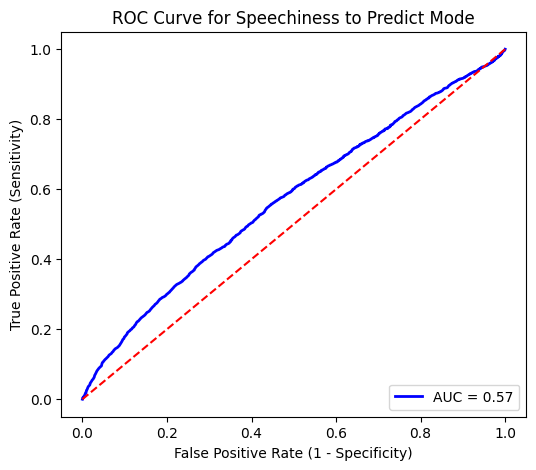

In [ ]:
X=data[[features[max_index]]] # this is speechiness
y = data['mode'] # just for clarity again - didn't change
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
print("Coefficient:",model.coef_[0], "Intercept:",model.intercept_)
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for Speechiness to Predict Mode')
plt.legend(loc='lower right')
plt.show()

The best single predictor of mode is speechiness, which corresponds to an AUC value of 0.57 when performing logistic regression. This is also not a fantastic predictor, but this is higher by 0.07

### (10) Which is a better predictor of whether a song is classical music – duration or the principal components you extracted in question 8?

In [ ]:
# question 10
data['is_classical'] = (data['track_genre'] == 'classical').astype(int)

# different predictors
X_duration = data[['duration']]  # Duration
X_pca = pca_df  # Principal components from Q8

# cross validation
X_train_duration, X_test_duration, y_train, y_test = train_test_split(X_duration, data['is_classical'], test_size=0.2, random_state=42)
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, data['is_classical'], test_size=0.2, random_state=42)

model_duration = LogisticRegression()
model_duration.fit(X_train_duration, y_train)

model_pca = LogisticRegression()
model_pca.fit(X_train_pca, y_train)

# probabilities for each model
y_pred_prob_duration = model_duration.predict_proba(X_test_duration)[:, 1]
y_pred_prob_pca = model_pca.predict_proba(X_test_pca)[:, 1]

# AUC for each model
auc_duration = roc_auc_score(y_test, y_pred_prob_duration)
auc_pca = roc_auc_score(y_test, y_pred_prob_pca)

print(f"AUC with duration: {auc_duration}")
print(f"AUC with principal components: {auc_pca}")

AUC with duration: 0.5582064656517253
AUC with principal components: 0.9404150233201866


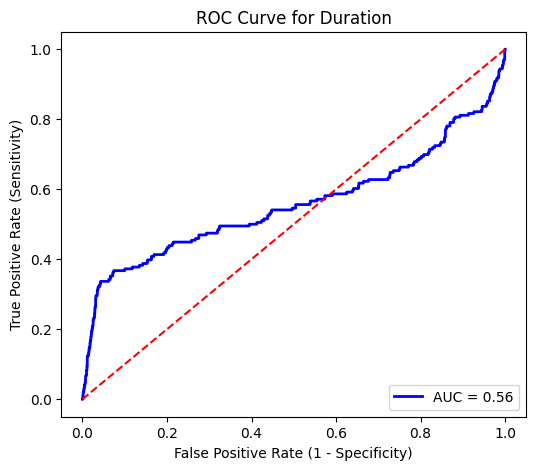

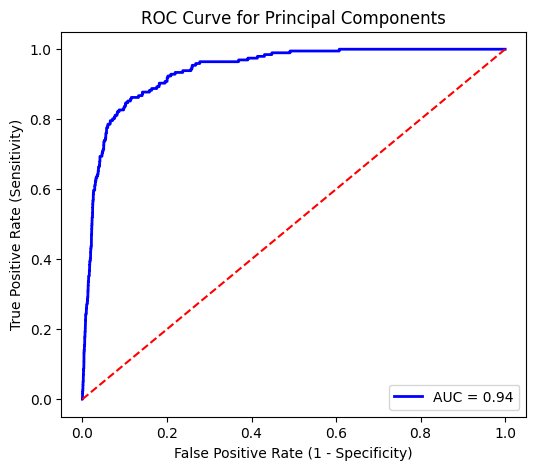

In [ ]:
# ROC curve for duration
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_duration)
auc = roc_auc_score(y_test, y_pred_prob_duration)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for Duration')
plt.legend(loc='lower right')
plt.show()

# ROC curve for principal components
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_pca)
auc = roc_auc_score(y_test, y_pred_prob_pca)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for Principal Components')
plt.legend(loc='lower right')
plt.show()

As shown by the AUC values and ROC curves, the principal components from question (8) are a much better predictor of whether a song is classical or not.

### Extra credit: Tell us something interesting about this dataset that is not trivial and not already part of an answer (implied or explicitly) to these enumerated questions [Suggestion: Do something with the number of beats per measure, something with the key, or something with the song or album titles]

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# extracredit
from sklearn.feature_extraction.text import CountVectorizer

song_titles = data['track_name'].str.lower()
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def preprocess_text(text):
    text = ''.join([char for char in text if char not in string.punctuation])
    tokens = text.split()
    tokens = [ps.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

song_titles = song_titles.apply(preprocess_text)

# analyze the frequency of terms in song titles
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(song_titles)
term_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
term_freq_sum = term_freq.sum().sort_values(ascending=False)
print("Top 20 most frequent terms in song titles:")
print(term_freq_sum.head(20))

Top 20 most frequent terms in song titles:
remix       1516
feat        1434
love        1405
mix         1276
de          1047
vivo        1042
ao           959
version      751
live         721
remast       704
christma     663
edit         656
la           597
origin       578
radio        461
dont         434
go           399
time         392
one          387
song         378
dtype: int64
